In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
print(most_recent_date)



('2017-08-23',)


Date one year from the last date: 2016-08-23


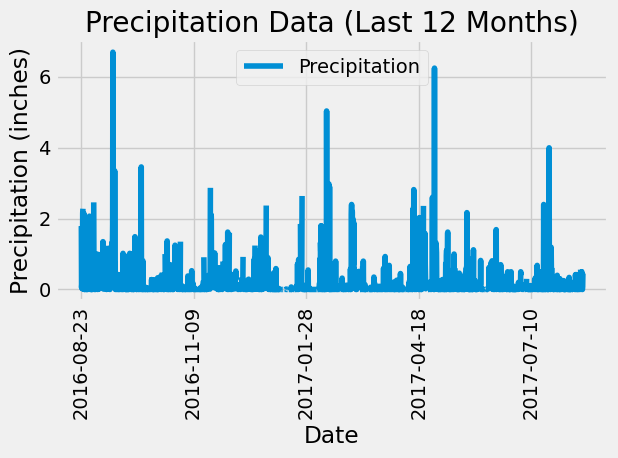

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in the data set
most_recent_date_str = session.query(func.max(Measurement.date)).scalar()
most_recent_date = dt.date.fromisoformat(most_recent_date_str)
last_year_date = most_recent_date - dt.timedelta(days=365)
print("Date one year from the last date:", last_year_date)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp)\
                .filter(Measurement.date >= last_year_date)\
                .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
scores_df = pd.DataFrame(scores, columns=["Date", "Precipitation"])

# Sort the DataFrame by date
scores_df = scores_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
scores_df.plot(kind='line', x="Date", y="Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation Data (Last 12 Months)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
scores_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station).filter_by(station=Station.station).count()
print(station_count)


9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                            group_by(Measurement.station).\
                            order_by(desc(func.count(Measurement.station))).\
                            all()

for row in active_station:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station_id = active_station[0][0]

most_active_station_temp_stats = session.query(
    func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).\
    first()
print(most_active_station_temp_stats)


USC00519281
(54.0, 85.0, 71.66378066378067)


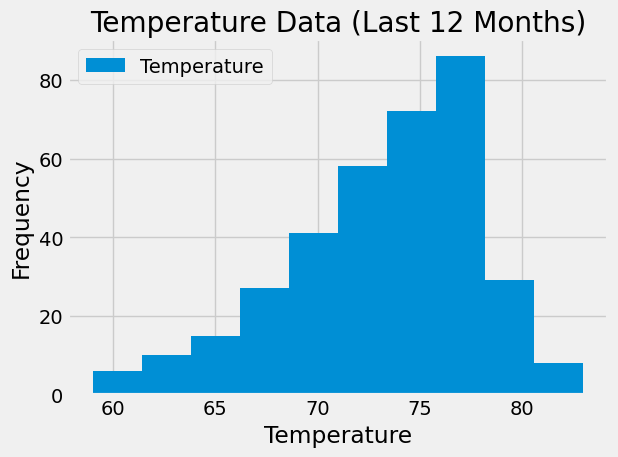

In [ ]:

last_twelve_months = session.query(Measurement.tobs)\
    .filter(Measurement.station == 'USC00519281')\
    .filter(Measurement.date >= last_year_date)\
    .all()

last_twelve_months_df = pd.DataFrame(last_twelve_months, columns=["Temperature"])

last_twelve_months_df.plot(kind='hist')

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Data (Last 12 Months)")
plt.tight_layout()
plt.show()


# Close Session

In [ ]:
# Close Session
session.close()